**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

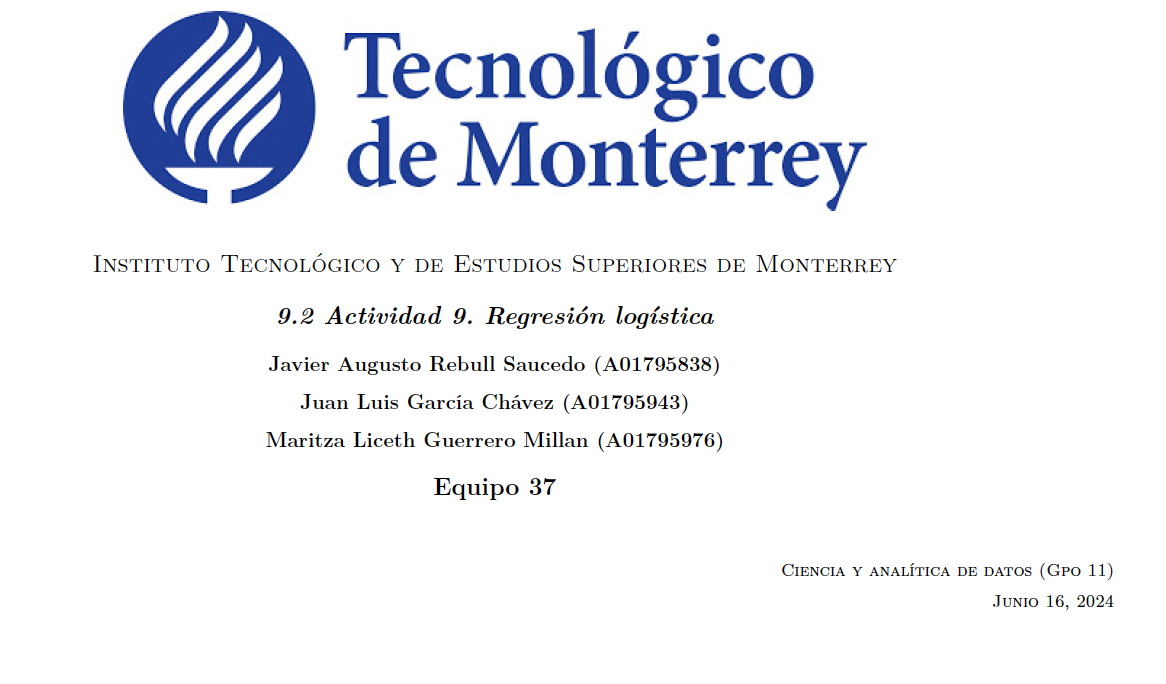

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Actividad9_RLog"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [5]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
data_df.describe(include="object").T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [9]:
valores_unicos = {'Columna': [], 'Nunique': [], 'Unique': []}
for column in data_df.columns:
    valores_unicos['Columna'].append(column)
    valores_unicos['Nunique'].append(data_df[column].nunique())
    valores_unicos['Unique'].append(data_df[column].unique())
valores_unicos_df = pd.DataFrame(valores_unicos)
valores_unicos_df

,Columna,Nunique,Unique
0,diagnosis,2,"[M, B]"
1,radius_mean,456,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18...."
2,texture_mean,479,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9..."
3,perimeter_mean,522,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119..."
4,area_mean,539,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,..."
5,smoothness_mean,474,"[0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12..."
6,compactness_mean,537,"[0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17..."
7,concavity_mean,537,"[0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578..."
8,concave points_mean,542,"[0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08..."
9,symmetry_mean,432,"[0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.208..."


1c) Búsqueda de valores faltantes.

In [10]:
valores_unicos = {'Columna': [], 'Valores faltantes': [], 'Porcentaje': []}
for column in data_df.columns:
    valores_unicos['Columna'].append(column)
    valores_unicos['Valores faltantes'].append(data_df[column].isna().sum())
    valores_unicos['Porcentaje'].append(data_df[column].isna().mean())
valores_unicos_df = pd.DataFrame(valores_unicos)
valores_unicos_df

,Columna,Valores faltantes,Porcentaje
0,diagnosis,0,0.0
1,radius_mean,0,0.0
2,texture_mean,0,0.0
3,perimeter_mean,0,0.0
4,area_mean,0,0.0
5,smoothness_mean,0,0.0
6,compactness_mean,0,0.0
7,concavity_mean,0,0.0
8,concave points_mean,0,0.0
9,symmetry_mean,0,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

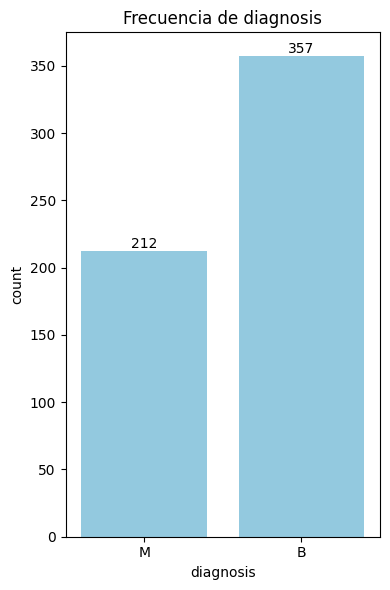

In [11]:
plt.figure(figsize=(4, 6))
ax = sns.countplot(x='diagnosis', data=data_df, color='skyblue')
plt.title(f'Frecuencia de diagnosis')
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.show()
plt.close()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

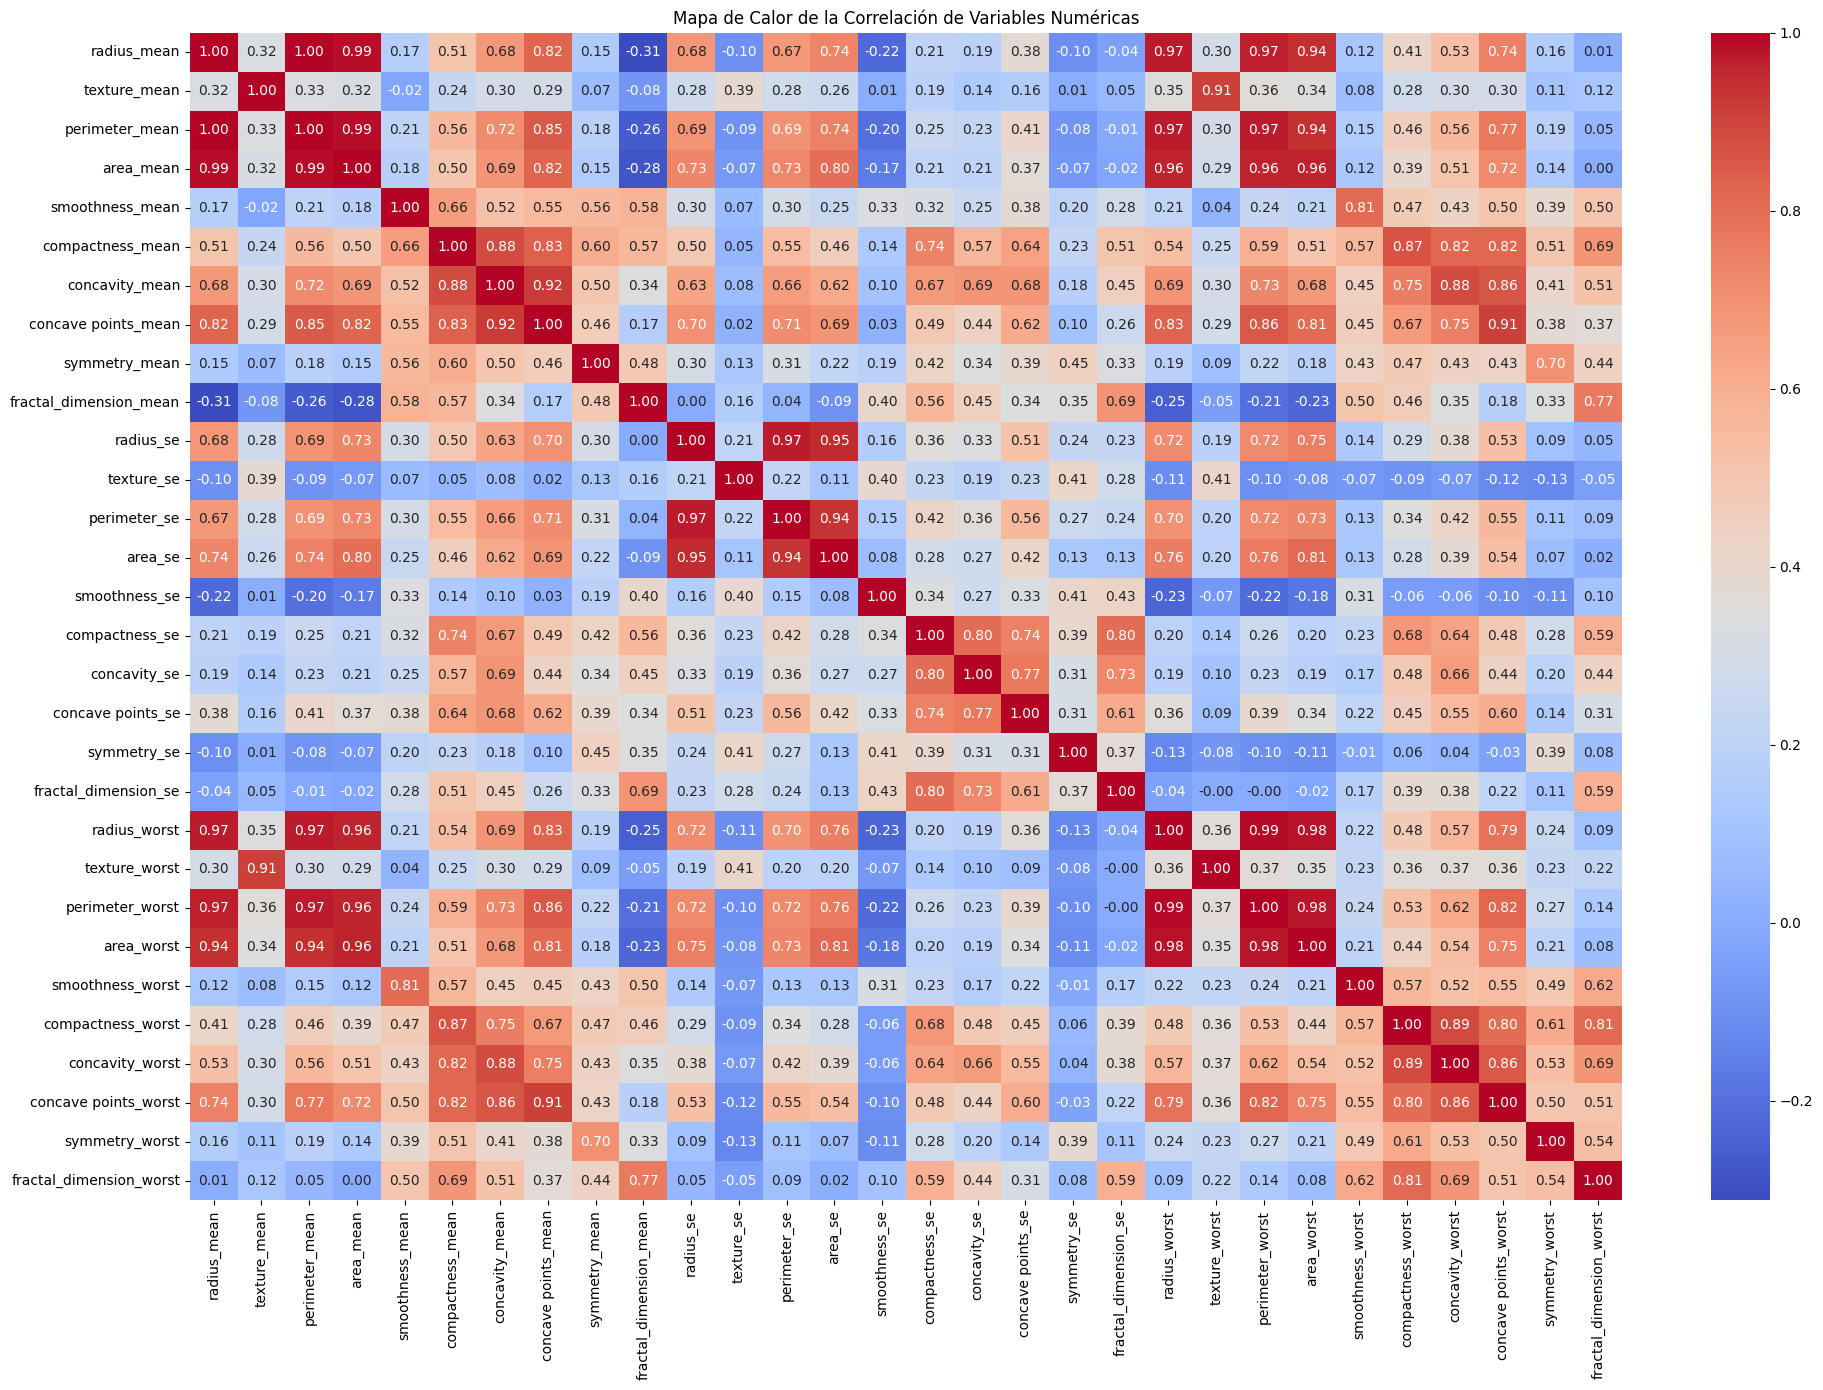

In [12]:
correlacion = data_df.select_dtypes(include='number').corr()

plt.figure(figsize=(20, 14))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

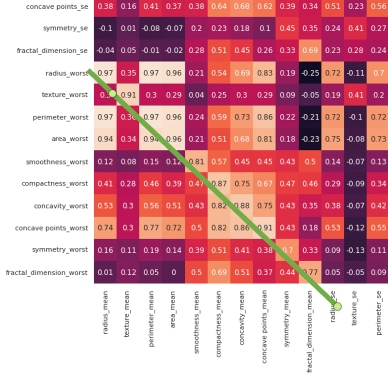

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [13]:
columnas_a_borrar = [col for col in data_df.columns if col.endswith('_worst')]

print(columnas_a_borrar)


for columna in columnas_a_borrar:
    if columna in data_df.columns:
        data_df.drop(columns=[columna], inplace=True)

data_df.info()

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  rad

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




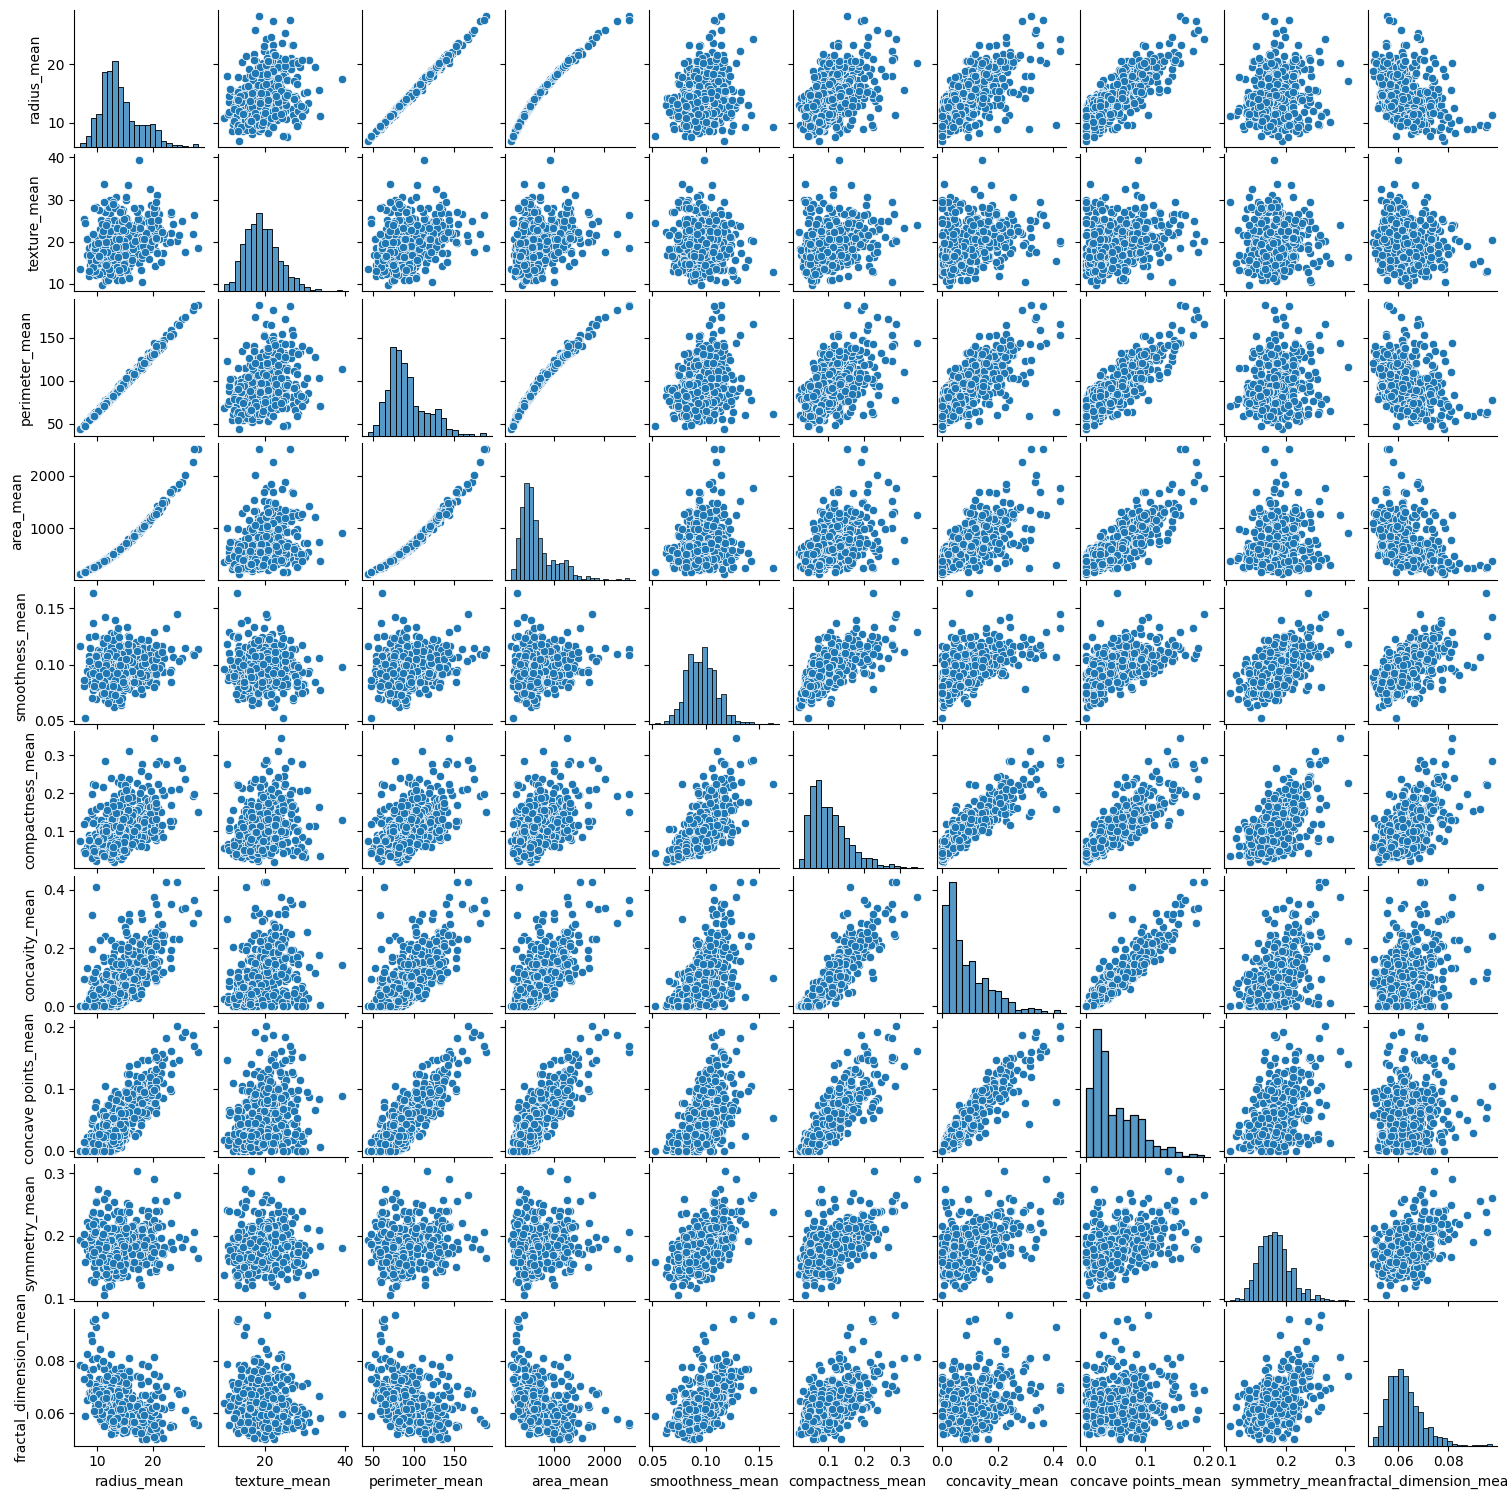

In [14]:
g=sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
g.fig.set_size_inches(15,15)

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


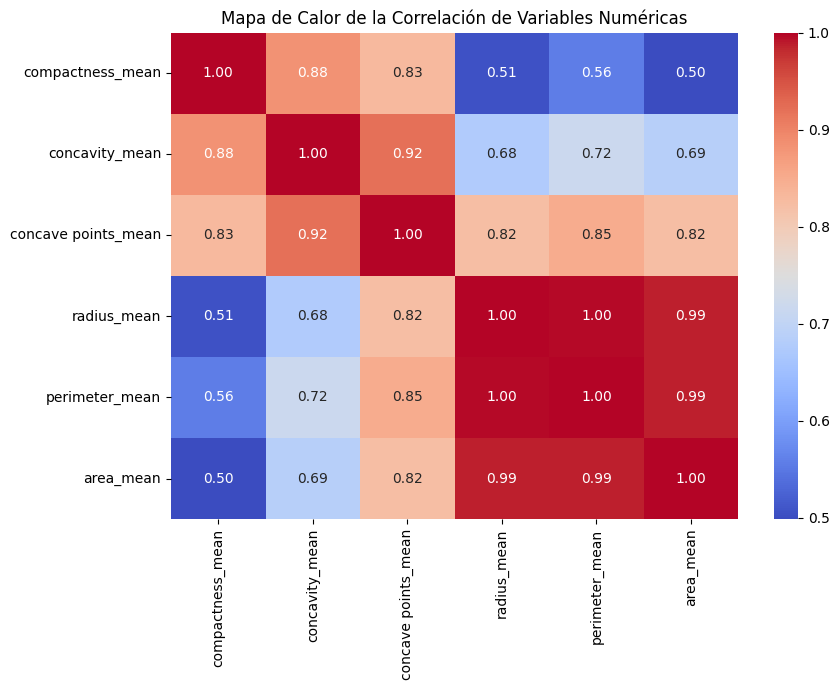

In [15]:
variables_correlacionadas = ['compactness_mean','concavity_mean','concave points_mean',
                             'radius_mean','perimeter_mean','area_mean']

correlacion = data_df[variables_correlacionadas].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [16]:
columnas_a_borrar = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se',
                   'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se']

for columna in columnas_a_borrar:
    if columna in data_df.columns:
        data_df.drop(columns=[columna], inplace=True)

data_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

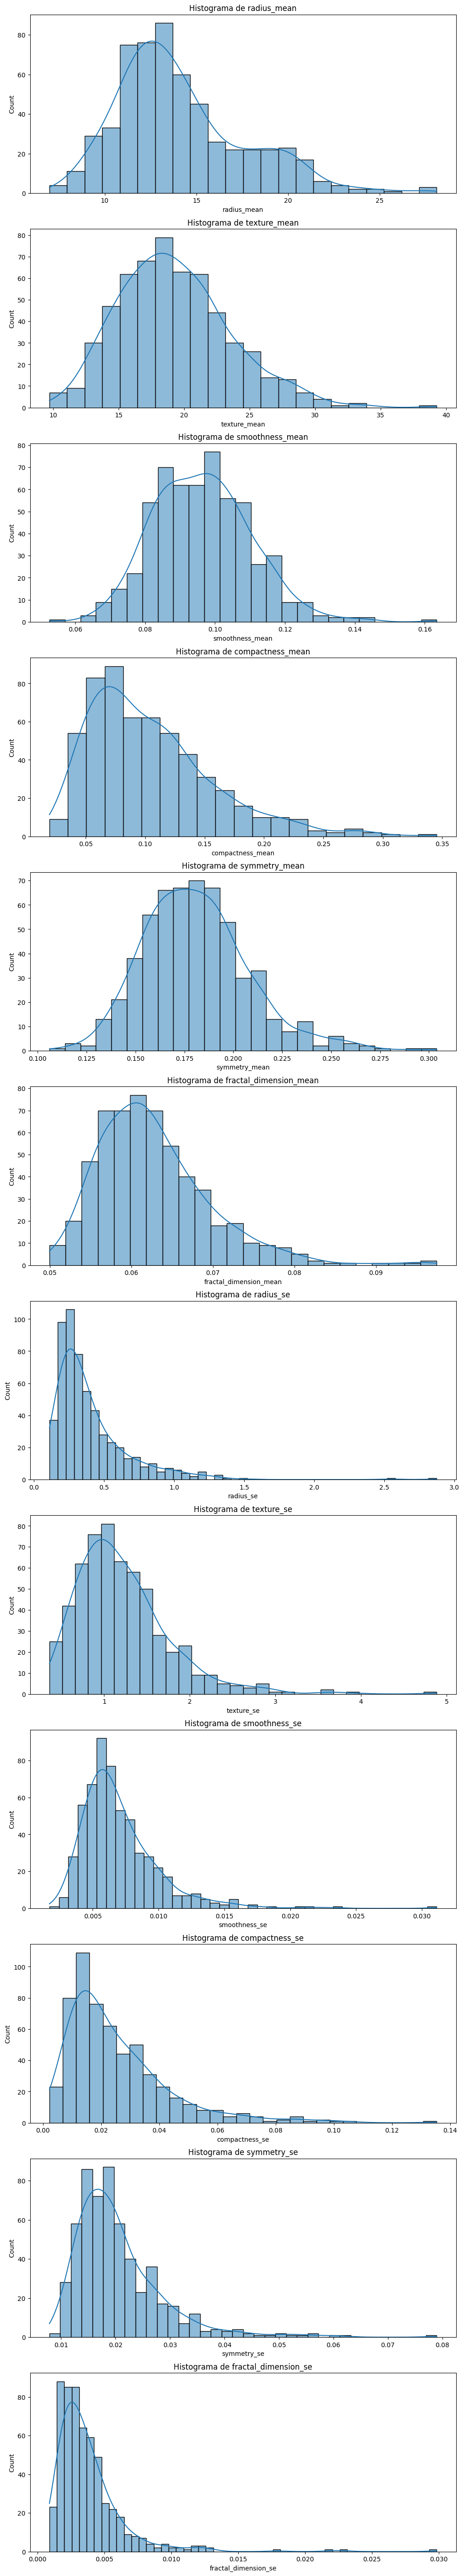

In [17]:
# Selecciona solo las columnas numéricas
columnas_numericas = data_df.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=len(columnas_numericas.columns), ncols=1, figsize=(12, 6*len(columnas_numericas.columns)))

for i, col in enumerate(columnas_numericas.columns):
    sns.histplot(data=data_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')

plt.show()

In [18]:
skewness = columnas_numericas.skew()
print("Valores de asimetría\n")
print(skewness)

skew_cols = skewness[skewness > 1].index.tolist()

print("\n\nColumnas con sesgo positivo\n")
print(skew_cols)

Valores de asimetría

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64


Columnas con sesgo positivo

['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


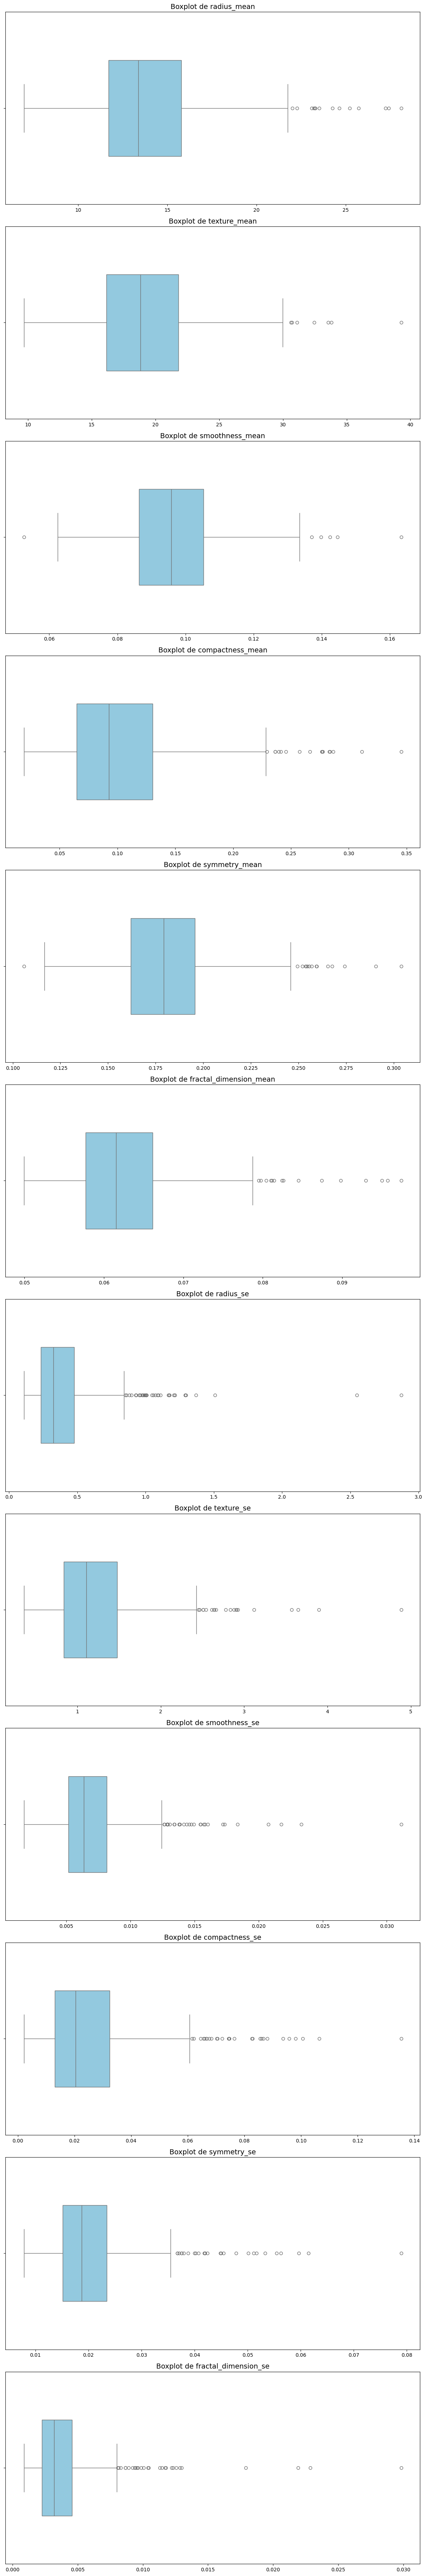

Columnas numéricas fuera del intervalo [0,1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [19]:
# Configurar los subplots
fig, axes = plt.subplots(nrows=len(columnas_numericas.columns), ncols=1, figsize=(12, 6*len(columnas_numericas.columns)))

# Definir el color para los box plots
box_color = 'skyblue'

for i, col in enumerate(columnas_numericas.columns):
    sns.boxplot(data=data_df, x=col, ax=axes[i], color=box_color, width=0.5)  # Ajustar el color y el ancho del box plot
    axes[i].set_title(f'Boxplot de {col}', fontsize=14)
    axes[i].set_xlabel('')  # Eliminar etiqueta del eje x para mayor claridad

plt.tight_layout()
plt.show()

# Verifica si alguna de las condiciones (valor < 0) o (valor > 1) es verdadera
out_of_range = np.logical_or(columnas_numericas < 0, columnas_numericas > 1)

# Selecciona las columnas que están fuera del intervalo [0,1]
scale_cols = columnas_numericas.columns[out_of_range.any()].tolist()

print("Columnas numéricas fuera del intervalo [0,1]:", scale_cols)

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [20]:
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('data.csv')

# Configurar la columna 'id' como índice
data_df.set_index('id', inplace=True)

# Separar los predictores (X) y la variable de respuesta (y)
X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

# Dividir el conjunto en entrenamiento y prueba (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
columnas_a_borrar = [col for col in data_df.columns if col.endswith('_worst')]
columnas_a_borrar.extend(['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se',
                   'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se'])

def drop_columns(X):
    return X.drop(columns=columnas_a_borrar)

drop_columns_transformer = FunctionTransformer(drop_columns, validate=False)

# Crear el ColumnTransformer con remainder='passthrough'
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', drop_columns_transformer, columnas_a_borrar)
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def metrics_score(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels = ['B','M'], yticklabels = ['B','M'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('Recall:', recall_score(y_test, predicted, pos_label='M'))
    print('Precision:', precision_score(y_test, predicted, pos_label='M'))
    print('Accuracy:', accuracy_score(y_test, predicted))

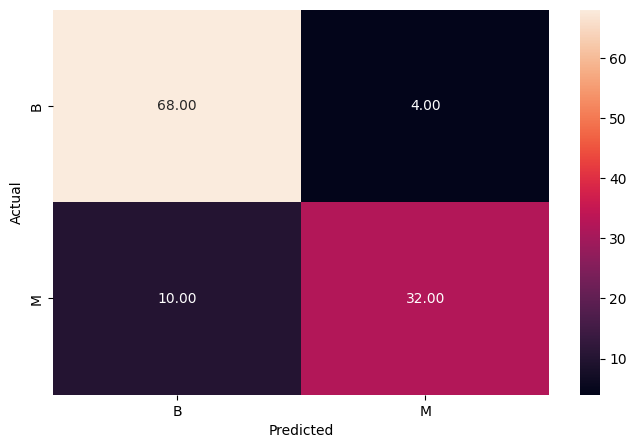

Recall: 0.7619047619047619
Precision: 0.8888888888888888
Accuracy: 0.8771929824561403


In [23]:
# Crear y entrenar el modelo de regresión logística
logr_model = LogisticRegression(max_iter=10000)

# Aplicar el transformador a los datos de entrenamiento
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

# Entrenar el modelo
logr_model.fit(X_train_transformed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logr_model.predict(X_test_transformed)

metrics_score(y_test, y_pred)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [24]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

def apply_sqrt(X):
    X[skew_cols] = np.sqrt(X[skew_cols])
    return X

sqrt_transformer = FunctionTransformer(apply_sqrt, validate=False)

# Crear el ColumnTransformer con remainder='passthrough'
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', drop_columns_transformer, columnas_a_borrar),
        ('sqrt_transform', sqrt_transformer, skew_cols),
        ('minmax_scaler', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)



6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

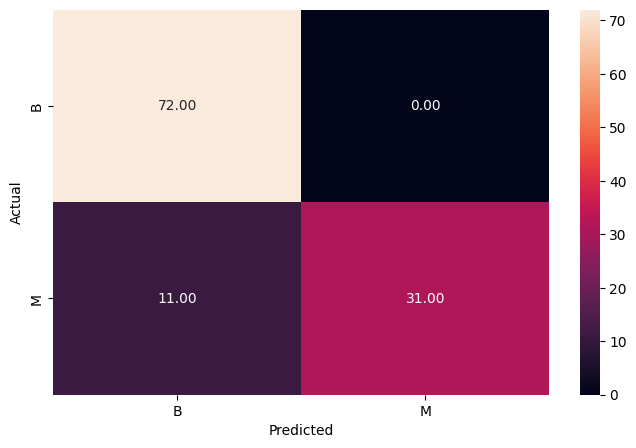

Recall: 0.7380952380952381
Precision: 1.0
Accuracy: 0.9035087719298246


In [25]:
# Crear el pipeline con el transformador y el modelo de regresión logística
logr_model2 = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression(max_iter=10000))
])

# Entrenar el modelo
logr_model2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logr_model2.predict(X_test)

metrics_score(y_test, y_pred)

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

Número de componentes que explican el 99% de la varianza: 17


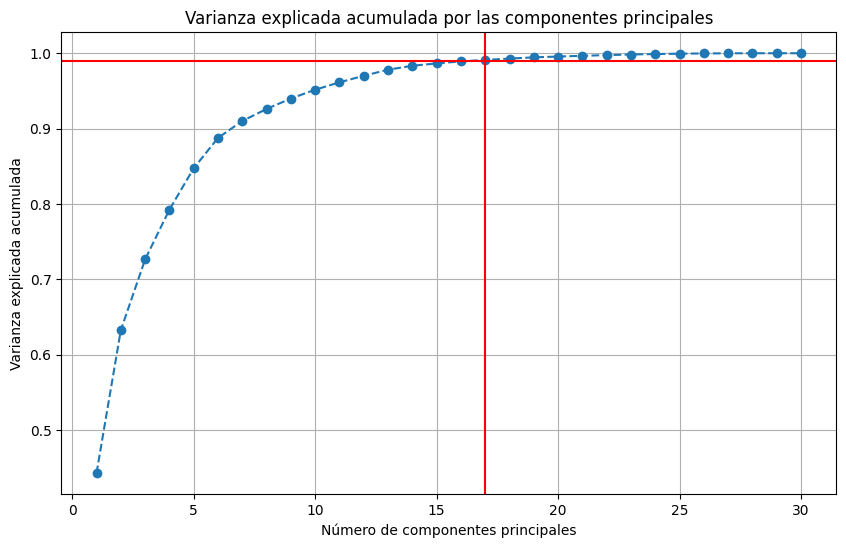

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Determinar el número de componentes que explican el 99% de la varianza
num_components_99 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.99) + 1
print(f"Número de componentes que explican el 99% de la varianza: {num_components_99}")

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.99, color='r', linestyle='-')
plt.axvline(x=num_components_99, color='r', linestyle='-')
plt.title('Varianza explicada acumulada por las componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

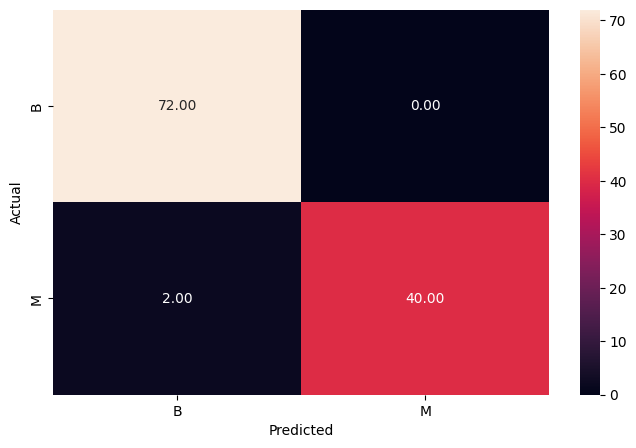

Recall: 0.9523809523809523
Precision: 1.0
Accuracy: 0.9824561403508771


In [28]:
# Crear el pipeline con escalamiento, PCA y regresión logística
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components_99)),
    ('logistic_regression', LogisticRegression(max_iter=10000))
])

# Entrenar el modelo
logr_model3.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logr_model3.predict(X_test)

metrics_score(y_test, y_pred)

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

En un modelo de diagnóstico médico, la métrica más importante suele ser el recall, especialmente en la detección de enfermedades graves. Identificar correctamente a todos los pacientes que tienen la enfermedad es fundamental para asegurar que reciban el tratamiento adecuado a tiempo. Un bajo desempeño en recall indica una alta tasa de falsos negativos, lo que significa que muchos casos verdaderamente positivos no se diagnostican correctamente, lo que puede tener consecuencias graves para los pacientes.

Para maximizar el recall y reducir el riesgo de falsos negativos, se puede ajustar el umbral de decisión, disminuyéndolo por debajo del estándar habitual de 0.5. Esto haría que el modelo se incline más a clasificar una muestra como positiva, aumentando así la sensibilidad y reduciendo la posibilidad de pasar por alto casos verdaderamente positivos.

Sin embargo, también es importante considerar la métrica de precision, que controla los falsos positivos. Un alto número de falsos positivos puede causar ansiedad, depresión y angustia en los pacientes, ya que recibir un diagnóstico incorrecto de una enfermedad grave puede tener un impacto emocional significativo. Por tanto, mientras se busca maximizar el recall, no se debe descuidar la precision.

En conclusión, ajustar el umbral de decisión es una tarea delicada que requiere un análisis cuidadoso del contexto y del caso específico. El objetivo es encontrar un balance que permita identificar correctamente a la mayoría de los pacientes enfermos sin causar un número excesivo de falsos positivos, logrando así los resultados deseados sin afectar significativamente otras métricas importantes.